In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
diabetes_df = pd.read_csv("resources/diabetes_prediction_cleaned_one_hot_encoding.csv")
diabetes_df.head()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes_status,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.691761,0,1,-0.282234,0.787897,0.047704,0,1,0,0,0,0,0,0,1,0
1,0.538015,0,0,0.018883,0.787897,-1.426210,0,1,0,0,1,0,0,0,0,0
2,-0.615730,0,0,0.018883,-0.120279,0.489878,0,0,1,0,0,0,0,0,1,0
3,-0.260731,0,0,-0.583350,-0.120279,0.416183,0,1,0,0,0,1,0,0,0,0
4,1.514261,1,1,-1.035025,-1.028455,0.416183,0,0,1,0,0,1,0,0,0,0


In [3]:
# Define features set
X = diabetes_df.copy()
X.drop("diabetes_status", axis=1, inplace=True)
X.head()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.691761,0,1,-0.282234,0.787897,0.047704,1,0,0,0,0,0,0,1,0
1,0.538015,0,0,0.018883,0.787897,-1.426210,1,0,0,1,0,0,0,0,0
2,-0.615730,0,0,0.018883,-0.120279,0.489878,0,1,0,0,0,0,0,1,0
3,-0.260731,0,0,-0.583350,-0.120279,0.416183,1,0,0,0,1,0,0,0,0
4,1.514261,1,1,-1.035025,-1.028455,0.416183,0,1,0,0,1,0,0,0,0


In [4]:
# Define target vector
y = diabetes_df["diabetes_status"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22735,178
Actual 1,715,1372


Accuracy Score : 0.96428
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22913
           1       0.89      0.66      0.75      2087

    accuracy                           0.96     25000
   macro avg       0.93      0.82      0.87     25000
weighted avg       0.96      0.96      0.96     25000



## Feature Importance

In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.381466876881998, 'blood_glucose_level'),
 (0.304744156999583, 'hba1c_level'),
 (0.14801035646085103, 'age'),
 (0.10940403451322339, 'bmi'),
 (0.017492388599165007, 'hypertension'),
 (0.012745054542546288, 'heart_disease'),
 (0.005036571223543003, 'smoking_history_No Info'),
 (0.004070809497705769, 'smoking_history_former'),
 (0.0038623666424562365, 'smoking_history_never'),
 (0.0028726523279563555, 'smoking_history_current'),
 (0.002785776400575867, 'gender_Male'),
 (0.0026809916360613106, 'gender_Female'),
 (0.0024735979313180428, 'smoking_history_not current'),
 (0.002352724942954136, 'smoking_history_ever'),
 (1.641400062758387e-06, 'gender_Other')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

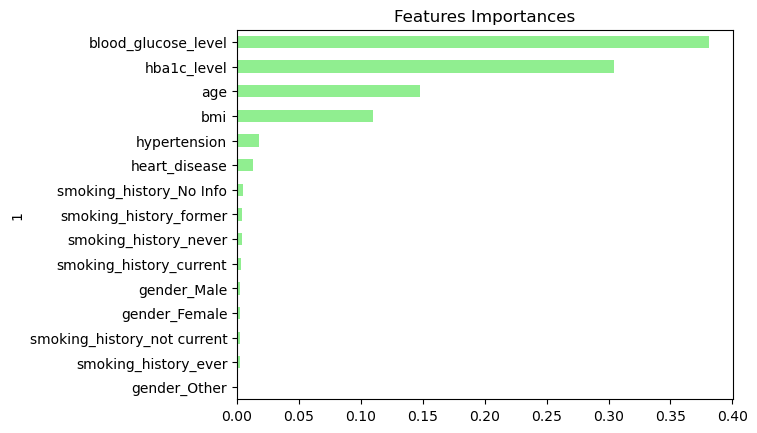

In [15]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)